In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv('fake_job_postings.csv')

---
# Extracting `salary_range`

The cleaned salary range are stored in column `salary_lower_limit` and `salary_upper_limit`

for data like "40000-59000", the corresponding lower and upper limits are 40000 and 59000

for data with NaN, they are all stored as (0, 0)

for data with just one value like "40000", lower limit is stored as 0 and upper as 40000

In [3]:
def extract_salary_range(t):
    a_string_lowercase = t.lower()
    if a_string_lowercase.islower():
        return (0, 0)
    return (0, int(t)) if '-' not in t else (int(t.split('-')[0]), int(t.split('-')[1]))

In [4]:
jobData['salary_range'] = jobData['salary_range'].fillna('0')

In [5]:
lower = []
upper = []
for i in range(len(jobData)):
    l, u = extract_salary_range(jobData['salary_range'][i])
    lower.append(l)
    upper.append(u)

jobData["salary_lower_limit"] = lower
jobData["salary_upper_limit"] = upper

In [ ]:
#jobData[["salary_range", "salary_lower_limit", "salary_upper_limit"]].head(50)

---

# Cleaning `function` using one-hot encoding

Columns can be accessed by using `function_type_is_<function name>`.

For example, if you want to know whether the job has the function of 'Marketing', simply use `jobPostings["function_type_is_Marketing"]` to generate a column of bool.

In [6]:
jobData["function"] = jobData["function"].fillna('Not specified')
jobData["function"] = jobData["function"].astype("category")

In [7]:
temp = jobData["function"]

# generate binary values using get_dummies
jobData = pd.get_dummies(jobData, columns=["function"], prefix=["function_type_is"], dtype="bool")
jobData = jobData.join(temp)

In [ ]:
#jobData.dtypes

---

# Extract country codes from `location` to column `country_code`

'NS' refers to not being specified, rather than a actual country code.

In [8]:
jobData["location"] = jobData["location"].fillna("NS") # Not specified

In [9]:
def extract_country_code(t):
    return t[:2]

In [10]:
code = []
for i in range(len(jobData)):
    code.append(extract_country_code(jobData["location"][i]))

jobData["country_code"] = code
jobData["country_code"] = jobData["country_code"].astype("category")

In [11]:
temp = jobData["country_code"]

# generate binary values using get_dummies
jobData = pd.get_dummies(jobData, columns=["country_code"], prefix=["country_code_is"], dtype="bool")
jobData = jobData.join(temp)

In [ ]:
jobData.dtypes

--- 

# Cleaning `required_experience`, `employment_type`, `required_education` and `industry`

In [12]:
jobData['employment_type'].fillna(value='Not specified', inplace=True)
jobData['required_experience'].fillna(value='Not specified', inplace=True)
jobData['required_education'].fillna(value='Not specified', inplace=True)
jobData['industry'].fillna(value='Not specified', inplace=True)

In [13]:
temp = jobData["required_experience"]

jobData = pd.get_dummies(jobData, columns=["required_experience"], prefix=["required_experience_is"], dtype="bool")
jobData = jobData.join(temp)

In [14]:
temp = jobData["employment_type"]

jobData = pd.get_dummies(jobData, columns=["employment_type"], prefix=["employment_type_is"], dtype="bool")
jobData = jobData.join(temp)

In [15]:
temp = jobData["required_education"]

jobData = pd.get_dummies(jobData, columns=["required_education"], prefix=["required_education_is"], dtype="bool")
jobData = jobData.join(temp)

In [16]:
temp = jobData["industry"]

jobData = pd.get_dummies(jobData, columns=["industry"], prefix=["industry"], dtype="bool")
jobData = jobData.join(temp)

In [19]:
jobData

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Venture Capital & Private Equity,industry_Veterinary,industry_Warehousing,industry_Wholesale,industry_Wine and Spirits,industry_Wireless,industry_Writing and Editing,industry
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,False,False,False,False,False,False,False,False,False,Not specified
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,False,False,False,False,False,False,False,False,False,Marketing and Advertising
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,False,False,False,False,False,False,False,False,False,Not specified
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,False,False,False,False,False,False,False,False,False,Computer Software
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,False,False,False,False,False,False,False,False,False,Hospital & Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,...,False,False,False,False,False,False,False,False,False,Computer Software
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,False,False,False,False,False,False,False,False,False,Internet
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,...,False,False,False,False,False,False,False,False,False,Not specified
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,0,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,...,False,False,False,False,False,False,False,False,False,Graphic Design


---

# Convert `telecommuting`, `has_company_logo`, `has_questions` columns dtype to bool



In [20]:
jobData['telecommuting'] = jobData['telecommuting'].astype(bool)
jobData['has_company_logo'] = jobData['has_company_logo'].astype(bool)
jobData['has_questions'] = jobData['has_questions'].astype(bool)

---
# Applying NLP to generate `NLP_pred`


In [21]:
jobData = jobData.astype({
    'title': 'string',
    'department': 'string',   
    'company_profile': 'string',
    'description': 'string',
    'requirements': 'string',
    'benefits': 'string',
})

In [22]:
jobData['department'].fillna(value='NODEPARTMENT', inplace=True)
jobData['company_profile'].fillna(value='NOCOMPANYPROFILE', inplace=True)
jobData['description'].fillna(value='NODESCRIPTION', inplace=True)
jobData['requirements'].fillna(value='NOREQUIREMENTS', inplace=True)
jobData['benefits'].fillna(value='NOBENEFITS', inplace=True)

In [23]:
documents = jobData[['title', 'department', 'company_profile', 'description', 'requirements', 'benefits']].agg(' '.join, axis=1)
documents

0        Marketing Intern Marketing We're Food52, and w...
1        Customer Service - Cloud Video Production Succ...
2        Commissioning Machinery Assistant (CMA) NODEPA...
3        Account Executive - Washington DC Sales Our pa...
4        Bill Review Manager NODEPARTMENT SpotSource So...
                               ...                        
17875    Account Director - Distribution  Sales Vend is...
17876    Payroll Accountant Accounting WebLinc is the e...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer NODEPARTMENT NOCOMPANYPROFILE...
17879    Web Application Developers Engineering Vend is...
Length: 17880, dtype: object

In [24]:
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#Initializes objects needed to perform cleaning
regex_token = RegexpTokenizer(r'[a-zA-Z0-9\-]+')
stop_words = set(stopwords.words('english')) 
lem = WordNetLemmatizer()

#Converts part of speech tag from treebank syntax to wordnet syntax
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    return 'v'

#Function to tokenize, filter stop words and lemmatize words in text data
def pre_process_lem(text):
    
    #perform tokenization to obtain a list of words, with each word as an individual element
    tokenized_text = regex_token.tokenize(text.lower())
    
    #Filter out stop words with a loop, adding filtered words to a new list
    filtered_tokens=[]
    for word in tokenized_text:
        if word not in stop_words:
            filtered_tokens.append(word)
    
    #Tags filtered words with their relevant part of speech. Tagging is necessary for lemmatization.
    #Returns a tuple (<word>, <tag>), but tag is in treebank syntax.
    tagged_words = pos_tag(filtered_tokens)
    
    #Uses a loop to lemmatize words then add them to a new list
    lemmed_words = []
    for tagged_word in tagged_words:
        #Lemmatizer method takes in (<word>, pos=<tag>) as inputs
        #The get_wordnet_pos() method is needed to convert tags from treebank syntax to wordnet syntax.
        lemmed_word = lem.lemmatize( tagged_word[0] , pos=get_wordnet_pos(tagged_word[1]) )
        lemmed_words.append(lemmed_word)
        
    return " ".join(lemmed_words)

In [25]:
lemmatized_documents = documents.apply(pre_process_lem)
lemmatized_documents

0        marketing intern marketing food52 create groun...
1        customer service - cloud video production succ...
2        commission machinery assistant cma nodepartmen...
3        account executive - washington dc sale passion...
4        bill review manager nodepartment spotsource so...
                               ...                        
17875    account director - distribution sale vend look...
17876    payroll accountant accounting weblinc e-commer...
17877    project cost control staff engineer - cost con...
17878    graphic designer nodepartment nocompanyprofile...
17879    web application developer engineering vend loo...
Length: 17880, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
#Bigram is used. It finds count of each pair words in the text. feature extraction
cv = CountVectorizer(ngram_range=(2,2))

#Vectorizer converts the list of words into a proper matrix of word counts for each word, for each data entry
X_text_data = cv.fit_transform(lemmatized_documents)
y_text_data = jobData['fraudulent']
X_text_data

<17880x893991 sparse matrix of type '<class 'numpy.int64'>'
	with 4116089 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text_data, y_text_data, test_size=0.3)
mnb = MultinomialNB()
mnb.fit(X_text_train, y_text_train)

MultinomialNB()

Accuracy:	 0.9891339085969958
F1 score:	 0.9004392386530015


<AxesSubplot:>

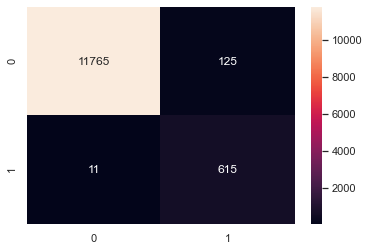

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

pred_text_train = pd.DataFrame(mnb.predict(X_text_train), columns=['prediction'], index=y_text_train.index)

print("Accuracy:\t", mnb.score(X_text_train, y_text_train))
print("F1 score:\t", f1_score(y_text_train, pred_text_train))
sb.heatmap(confusion_matrix(y_text_train, pred_text_train), annot=True, fmt='d')

Accuracy:	 0.9075316927665921
F1 score:	 0.45494505494505494


<AxesSubplot:>

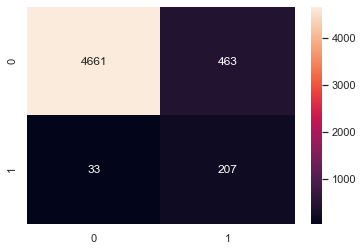

In [29]:
pred_text_test = pd.DataFrame(mnb.predict(X_text_test), columns=['prediction'], index=y_text_test.index)

print("Accuracy:\t", mnb.score(X_text_test, y_text_test))
print("F1 score:\t", f1_score(y_text_test, pred_text_test))
sb.heatmap(confusion_matrix(y_text_test, pred_text_test), annot=True, fmt='d')

In [30]:
nlp_pred = pd.DataFrame(mnb.predict_proba(X_text_data), columns=['nlp_p_real', 'nlp_p_fraud'])['nlp_p_fraud']
nlp_pred

0        2.629340e-139
1         0.000000e+00
2         6.502073e-99
3         0.000000e+00
4        1.449043e-191
             ...      
17875     0.000000e+00
17876    1.084576e-157
17877    3.162078e-143
17878     5.546700e-30
17879     0.000000e+00
Name: nlp_p_fraud, Length: 17880, dtype: float64

In [31]:
jobData["NLP_Pred"] = nlp_pred

---

# Exporting the cleaned dataset

In [32]:
jobData.dtypes

job_id                            int64
title                            string
location                         object
department                       string
salary_range                     object
                                 ...   
industry_Wine and Spirits          bool
industry_Wireless                  bool
industry_Writing and Editing       bool
industry                         object
NLP_Pred                        float64
Length: 311, dtype: object

In [34]:
jobData.to_csv('cleaned_data.csv', index=False) 